In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('..\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

..\input\items.csv
..\input\item_categories.csv
..\input\sales_train.csv.gz
..\input\sample_submission.csv.gz
..\input\shops.csv
..\input\test.csv.gz


In [20]:
item_categories = pd.read_csv("../input/item_categories.csv")
items = pd.read_csv("../input/items.csv")
shops = pd.read_csv("../input/shops.csv")
train = pd.read_csv("../input/sales_train.csv.gz")
test = pd.read_csv("../input/test.csv.gz")

In [22]:
print("Item categories")
print(item_categories.head(10))
print("\nItems")
print(items.head(10))
print("\nShops")
print(shops.head(10))
print("\nTrain set")
print(train.head(10))
print("\nTest set")
print(test.head(10))

Item categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9

Items
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   
5  ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...        5   
6           ***УДАР ПО ВОРО

In [18]:
print(train.info())
print(train.describe())
print(train.item_cnt_day.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e

In [19]:
train.sort_values(by=['date']).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
16164,01.01.2013,0,28,11613,1499.0,1.0
101474,01.01.2013,0,51,10283,667.0,1.0
10197,01.01.2013,0,19,2828,499.0,1.0
101457,01.01.2013,0,51,10390,150.0,1.0
101455,01.01.2013,0,51,10591,110.0,1.0


In [142]:
item_to_cat = {}
for idx, row in items.iterrows():
    #print(row)
    item_to_cat[row.item_id] = row.item_category_id
cat_id_to_name = {}
for idx, row in item_categories.iterrows():
    cat_id_to_name[row.item_category_id] = row.item_category_name

In [37]:
default_category_idx = len(item_categories)

In [38]:
train['item_category_id'] = train['item_id'].map(item_to_cat)

In [86]:
new_train = train[['date_block_num','shop_id','item_id','item_category_id','item_cnt_day']]

In [87]:
print(processing_train.head(10))

                                         item_cnt_day
shop_id date_block_num item_category_id              
0       0              2                         53.0
                       3                         28.0
                       4                         16.0
                       5                         28.0
                       6                         65.0
                       11                        24.0
                       13                         9.0
                       14                         8.0
                       15                         6.0
                       19                       345.0


In [115]:
processing_train = pd.DataFrame(new_train.groupby(['date_block_num','item_category_id'])['item_cnt_day'].sum().reset_index())

In [116]:
print(processing_train)

      date_block_num  item_category_id  item_cnt_day
0                  0                 0           1.0
1                  0                 1           1.0
2                  0                 2        1390.0
3                  0                 3         440.0
4                  0                 4         251.0
5                  0                 5         623.0
6                  0                 6         870.0
7                  0                 9         149.0
8                  0                11         375.0
9                  0                13          84.0
10                 0                14         143.0
11                 0                15         268.0
12                 0                18           3.0
13                 0                19        8983.0
14                 0                21        3492.0
15                 0                22        1286.0
16                 0                23        4150.0
17                 0                25        

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

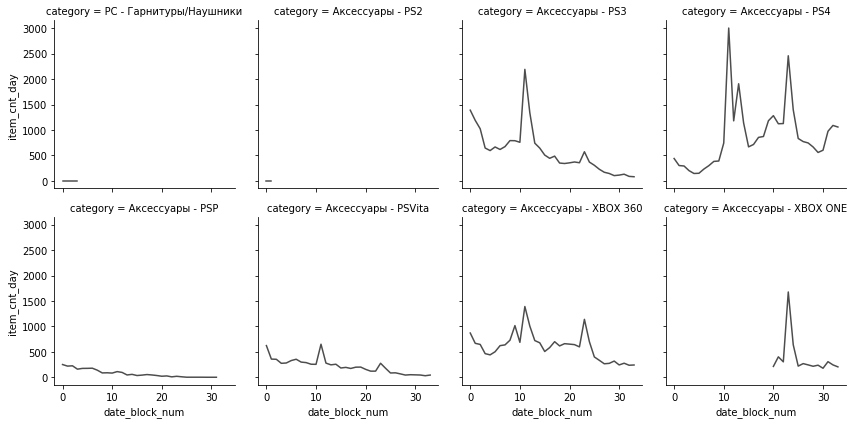

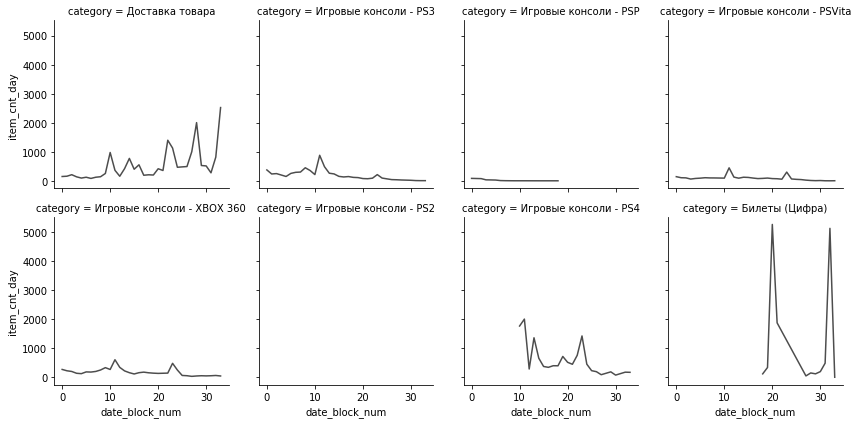

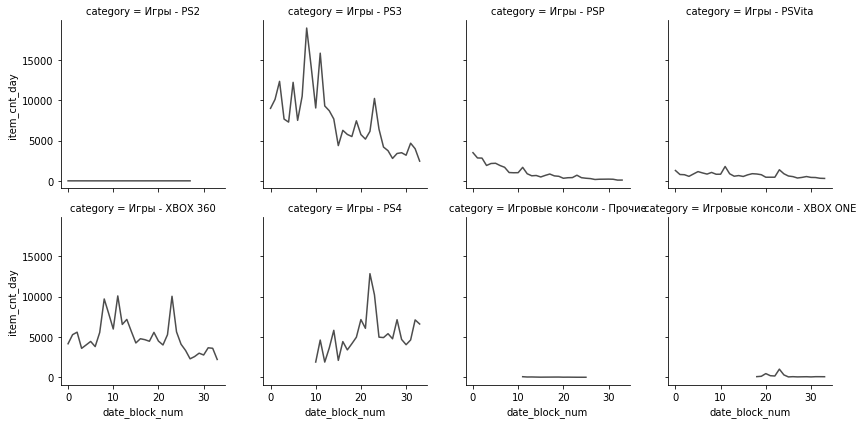

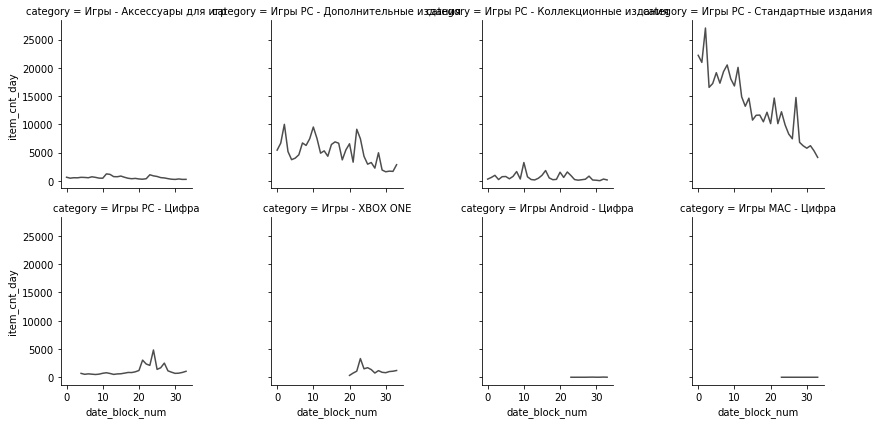

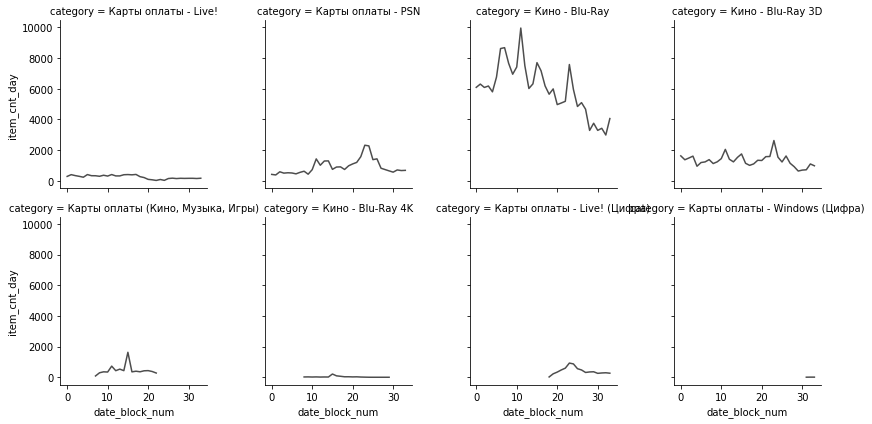

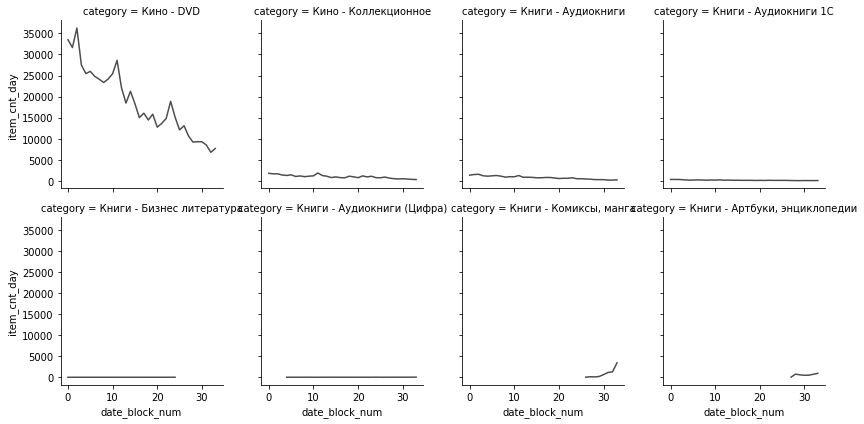

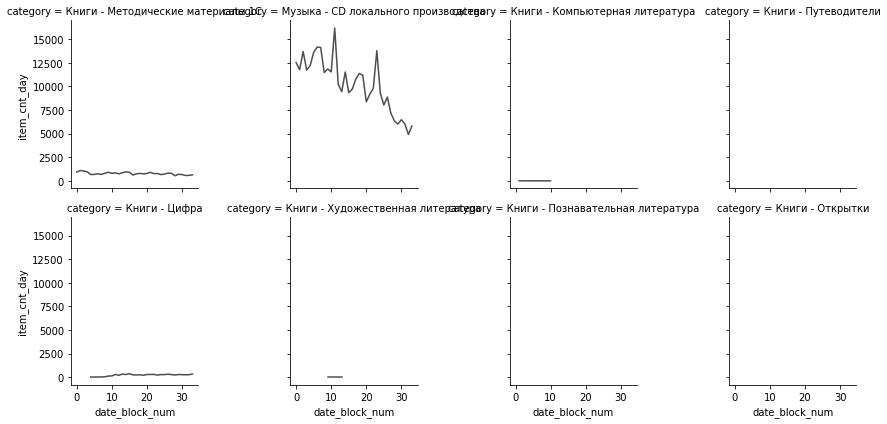

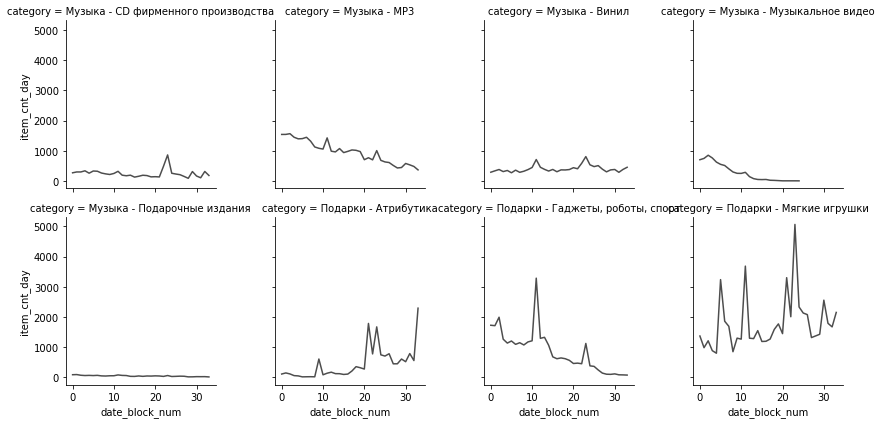

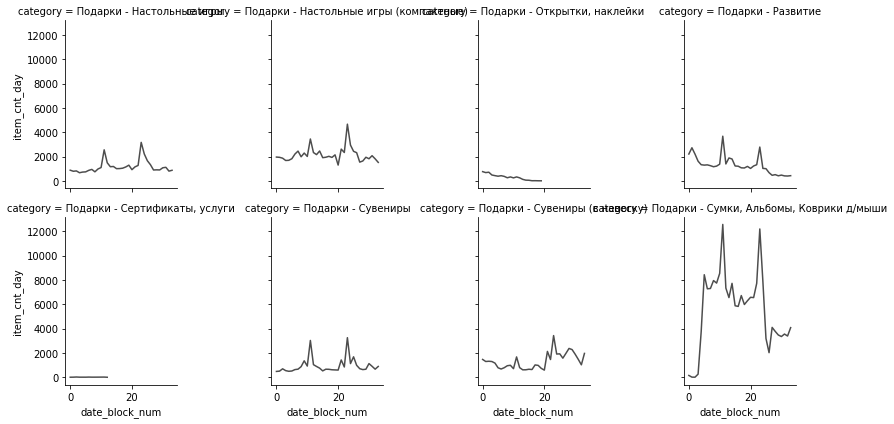

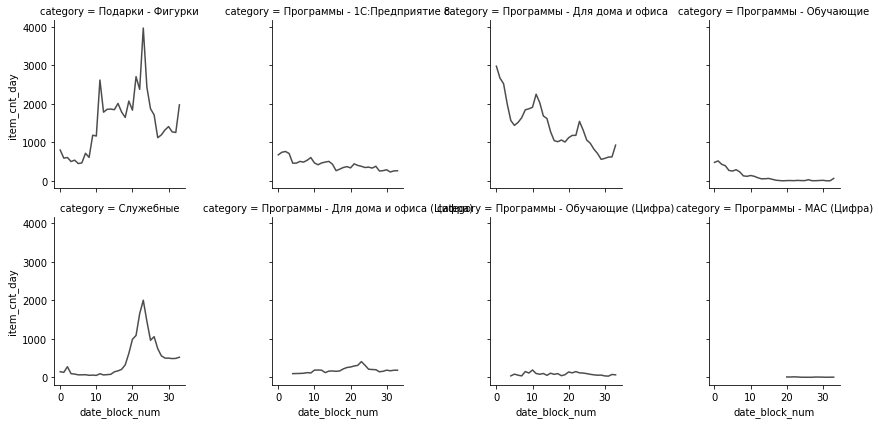

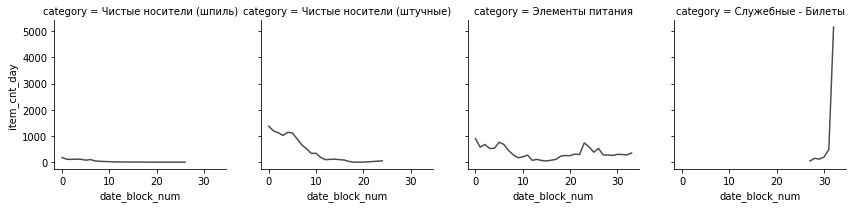

In [154]:
processing_train['category'] = processing_train['item_category_id'].map(cat_id_to_name)
for i in range(0,84,8):
    processed = processing_train[(processing_train.item_category_id >= i ) & (processing_train.item_category_id < i+8)]
    g = sns.FacetGrid(processed, col="category", col_wrap=4, height=3)
    g.map(sns.lineplot, "date_block_num", "item_cnt_day", color=".3", ci=None);


In [155]:
processing_train_2 = pd.DataFrame(new_train.groupby(['date_block_num','shop_id'])['item_cnt_day'].sum().reset_index())

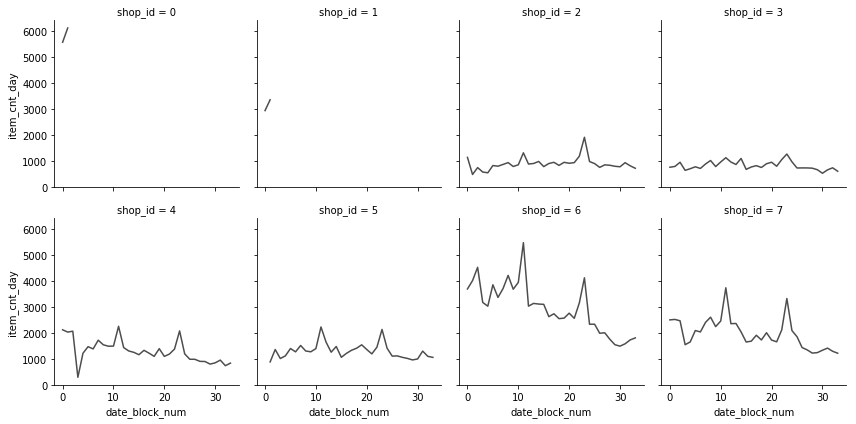

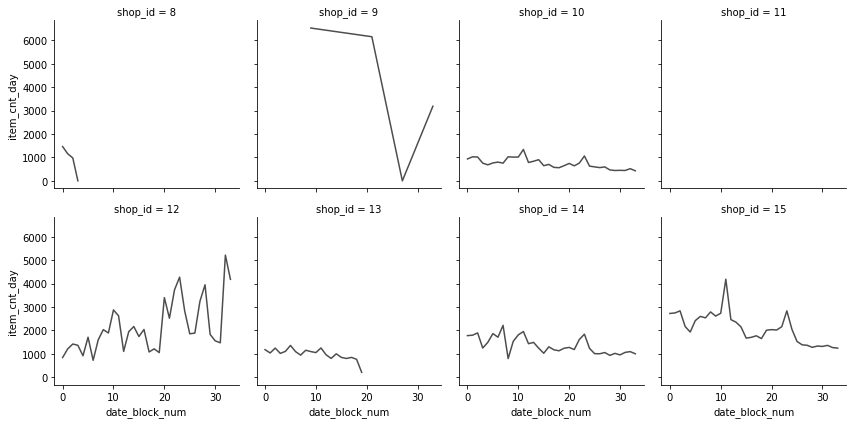

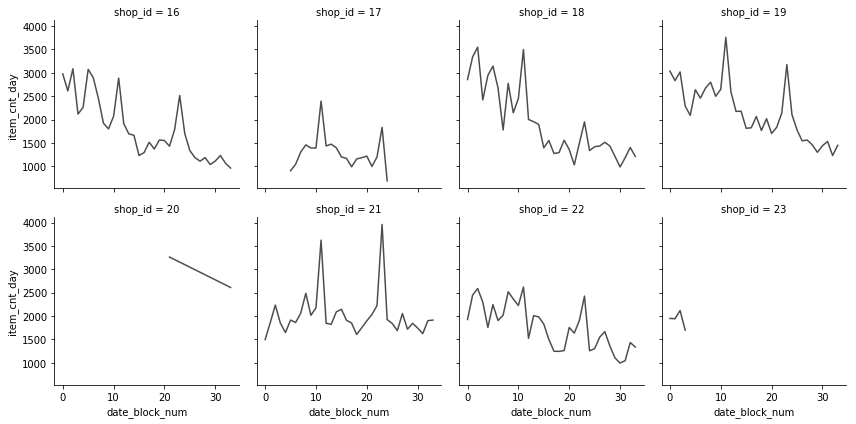

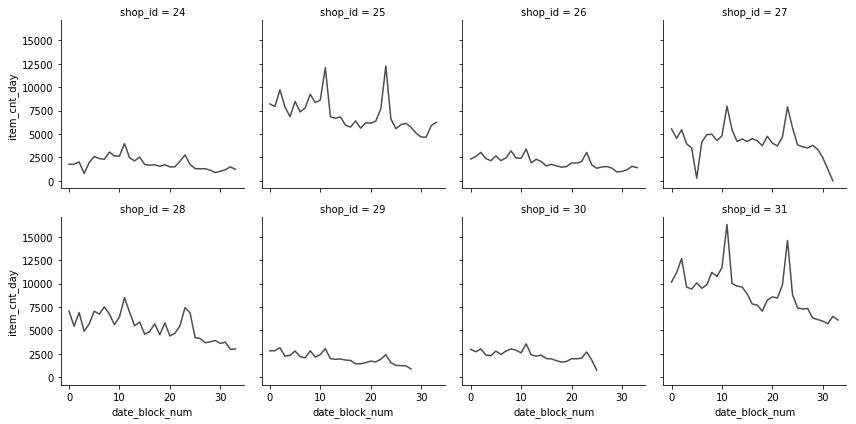

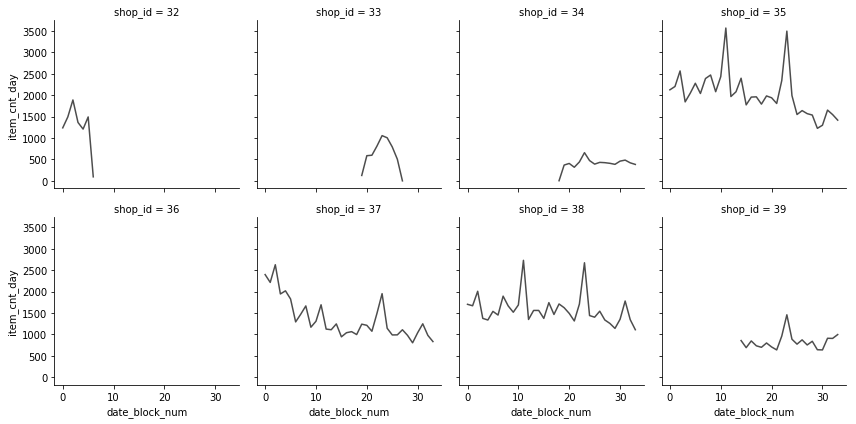

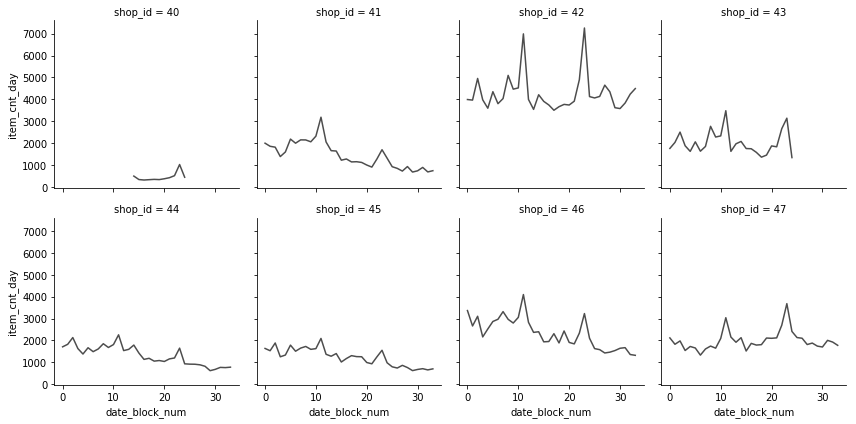

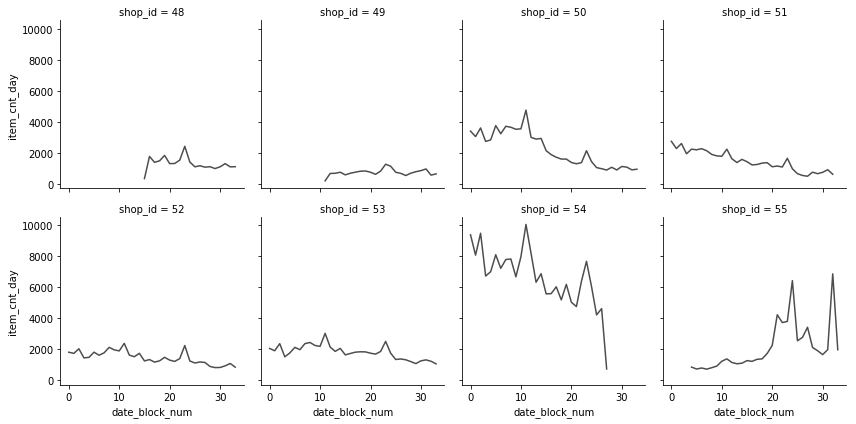

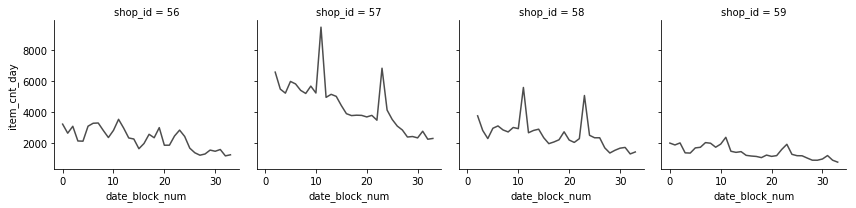

In [158]:
for i in range(0,61,8):
    processed = processing_train_2[(processing_train_2.shop_id >= i) & (processing_train_2.shop_id < i+8)]
    g = sns.FacetGrid(processed, col="shop_id", col_wrap=4, height=3)
    g.map(sns.lineplot, "date_block_num", "item_cnt_day", color=".3", ci=None);


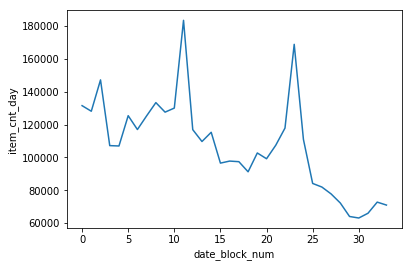

In [159]:
processing_train_3 = pd.DataFrame(new_train.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index())
sns.lineplot(x='date_block_num',y='item_cnt_day',data=processing_train_3)

In [164]:
for c in new_train:
    print(f"NANs in {c}:{new_train[c].isnull().sum()}")

NANs in date_block_num:0
NANs in shop_id:0
NANs in item_id:0
NANs in item_category_id:0
NANs in item_cnt_day:0
